<a href="https://colab.research.google.com/github/husseing/UFC-ML-Judging/blob/master/UFCJudging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MMA ML JUDGE PROJECT

IMPORTING THE DATA

In [91]:
import csv
import numpy as np
import random
import torch
import torch.utils.data

In [68]:
import pandas as pd

In [92]:
'''header = ['R_fighter','B_fighter','R_KD','B_KD','R_SIG_STR.','B_SIG_STR.',
          'R_SIG_STR_pct','B_SIG_STR_pct','R_TOTAL_STR.','B_TOTAL_STR.',
          'R_TD','B_TD','R_TD_pct','B_TD_pct','R_SUB_ATT','B_SUB_ATT','R_PASS',
          'B_PASS','R_REV','B_REV','R_HEAD','B_HEAD','R_BODY','B_BODY','R_LEG',
          'B_LEG','R_DISTANCE','B_DISTANCE','R_CLINCH','B_CLINCH','R_GROUND',
          'B_GROUND','win_by','last_round','last_round_time','Format','Referee',
          'date','location','Fight_type','Winner']
          names=header'''
          
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/raw_total_fight_data.csv",
    sep=";",
    index_col=False)

In [5]:
df.shape

(5144, 41)

In [ ]:
df

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,1 of 4,0 of 2,25%,0%,1,0,1,0,0,0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,2 of 2,0 of 0,100%,0%,1,0,3,0,0,0,4 of 5,0 of 7,4 of 6,0 of 2,0 of 0,2 of 3,5 of 8,2 of 12,2 of 2,0 of 0,1 of 1,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,0 of 0,1 of 1,0%,100%,0,0,0,0,0,0,65 of 144,43 of 152,25 of 37,15 of 23,14 of 19,10 of 10,103 of 198,68 of 184,1 of 2,0 of 1,0 of 0,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,0 of 3,1 of 3,0%,33%,0,0,0,1,0,0,42 of 145,40 of 166,15 of 24,13 of 19,16 of 23,3 of 4,60 of 173,42 of 167,9 of 15,10 of 12,4 of 4,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,0 of 0,2 of 2,0%,100%,0,0,0,0,0,0,39 of 114,65 of 114,6 of 7,7 of 8,19 of 23,1 of 1,50 of 126,62 of 111,14 of 18,5 of 6,0 of 0,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,Gerard Gordeau,Kevin Rosier,1,0,11 of 17,0 of 3,64%,0%,11 of 17,0 of 3,0 of 0,0 of 0,0%,0%,0,0,0,0,0,0,7 of 13,0 of 1,1 of 1,0 of 1,3 of 3,0 of 1,5 of 8,0 of 3,0 of 0,0 of 0,6 of 9,0 of 0,KO/TKO,1,0:59,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Gerard Gordeau
5140,Ken Shamrock,Patrick Smith,0,0,1 of 1,4 of 8,100%,50%,4 of 4,16 of 20,1 of 2,0 of 0,50%,0%,2,0,0,0,0,0,1 of 1,1 of 4,0 of 0,1 of 1,0 of 0,2 of 3,0 of 0,1 of 1,0 of 0,1 of 1,1 of 1,2 of 6,Submission,1,1:49,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Ken Shamrock
5141,Royce Gracie,Art Jimmerson,0,0,0 of 3,0 of 0,0%,0%,4 of 7,0 of 0,1 of 1,0 of 0,100%,0%,0,0,2,0,0,0,0 of 1,0 of 0,0 of 0,0 of 0,0 of 2,0 of 0,0 of 3,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,Submission,1,2:18,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Royce Gracie
5142,Kevin Rosier,Zane Frazier,2,0,15 of 27,12 of 28,55%,42%,38 of 53,13 of 29,0 of 0,0 of 0,0%,0%,0,0,0,0,0,0,12 of 23,7 of 19,3 of 4,3 of 6,0 of 0,2 of 3,4 of 10,0 of 7,4 of 9,10 of 19,7 of 8,2 of 2,KO/TKO,1,4:20,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Kevin Rosier


DATAFRAME CLEANING AND FEATURE ENGINEERING:

Cleaning the data in the dataframe such that they could be usable in training a neural network. 

Feature engineering where only relevant info would be fed into the model.

In [ ]:
header_list=[]
for i in df:
  header_list.append(i)
print(header_list)

['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.', 'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.', 'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT', 'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY', 'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH', 'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round', 'last_round_time', 'Format', 'Referee', 'date', 'location', 'Fight_type', 'Winner']


In [93]:
#LABELS ARE 0 for Red corner win (R) and 1 for Blue corner win (B)
#Changing the Winner column which will also be used as a label to be 1 or 0

df['Winner']= (df['Winner']==df["B_fighter"])
df['Winner'] = df['Winner'].astype(int)

In [7]:
#All possible ways to win
ways_to_win=[]
for row in df.itertuples():
  if (row.win_by not in ways_to_win):
    ways_to_win.append(row.win_by)
print(ways_to_win)

['KO/TKO', "TKO - Doctor's Stoppage", 'Decision - Unanimous', 'Submission', 'Decision - Split', 'Decision - Majority', 'DQ', 'Overturned', 'Could Not Continue', 'Other']


In [94]:
#Removing all records where the win was not by decision
NonDecisionIndices=[]
for row in df.itertuples():
  if (row.win_by not in ['Decision - Unanimous','Decision - Split','Decision - Majority']):
    NonDecisionIndices.append(row.Index)

df.drop(NonDecisionIndices, inplace=True)


In [9]:
df.shape

(2279, 41)

In [ ]:
x=0
for row in df.itertuples():
  print(row)
  x+=1
  if x>4:
    break

Pandas(Index=3, R_fighter='Jimmie Rivera', B_fighter='Petr Yan', R_KD=0, B_KD=2, _5='73 of 192', _6='56 of 189', R_SIG_STR_pct='38%', B_SIG_STR_pct='29%', _9='76 of 195', _10='58 of 192', R_TD='0 of 3', B_TD='1 of 3', R_TD_pct='0%', B_TD_pct='33%', R_SUB_ATT=0, B_SUB_ATT=0, R_PASS=0, B_PASS=1, R_REV=0, B_REV=0, R_HEAD='42 of 145', B_HEAD='40 of 166', R_BODY='15 of 24', B_BODY='13 of 19', R_LEG='16 of 23', B_LEG='3 of 4', R_DISTANCE='60 of 173', B_DISTANCE='42 of 167', R_CLINCH='9 of 15', B_CLINCH='10 of 12', R_GROUND='4 of 4', B_GROUND='4 of 10', win_by='Decision - Unanimous', last_round=3, last_round_time='5:00', Format='3 Rnd (5-5-5)', Referee='Kevin MacDonald', date='June 08, 2019', location='Chicago, Illinois, USA', Fight_type='Bantamweight Bout', Winner=1)
Pandas(Index=4, R_fighter='Tai Tuivasa', B_fighter='Blagoy Ivanov', R_KD=0, B_KD=1, _5='64 of 144', _6='73 of 123', R_SIG_STR_pct='44%', B_SIG_STR_pct='59%', _9='66 of 146', _10='81 of 131', R_TD='0 of 0', B_TD='2 of 2', R_TD_pc

In [95]:
#Dropping unnecessary columns
df.drop(columns=['R_fighter','B_fighter','last_round','last_round_time','Format','Referee', 'date','location','Fight_type'], inplace=True)

In [11]:
df.shape

(2279, 32)

In [ ]:
df[:2]

,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,Winner
3,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,0 of 3,1 of 3,0%,33%,0,0,0,1,0,0,42 of 145,40 of 166,15 of 24,13 of 19,16 of 23,3 of 4,60 of 173,42 of 167,9 of 15,10 of 12,4 of 4,4 of 10,Decision - Unanimous,1
4,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,0 of 0,2 of 2,0%,100%,0,0,0,0,0,0,39 of 114,65 of 114,6 of 7,7 of 8,19 of 23,1 of 1,50 of 126,62 of 111,14 of 18,5 of 6,0 of 0,6 of 6,Decision - Unanimous,1


In [ ]:
cols=[]
for col in df.columns:
  cols.append(col)

print(cols)

['R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.', 'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.', 'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT', 'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY', 'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH', 'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'Winner']


In [96]:
#Getting the raw number instead of having it in the format of "x of y" strikes/TD etc
df['R_SIG_STR.']=df['R_SIG_STR.'].apply(lambda x: float((x.split(" of")[0])))
df['B_SIG_STR.']=df['B_SIG_STR.'].apply(lambda x: float((x.split(" of")[0])))
df['R_TOTAL_STR.']= df['R_TOTAL_STR.'].apply(lambda x: float((x.split(" of")[0])))
df['B_TOTAL_STR.']= df['B_TOTAL_STR.'].apply(lambda x: float((x.split(" of")[0])))
df['R_TD']= df['R_TD'].apply(lambda x: float((x.split(" of")[0])))
df['B_TD']= df['B_TD'].apply(lambda x: float((x.split(" of")[0])))
df['R_HEAD']= df['R_HEAD'].apply(lambda x: float((x.split(" of")[0])))
df['B_HEAD']= df['B_HEAD'].apply(lambda x: float((x.split(" of")[0])))
df['R_BODY']= df['R_BODY'].apply(lambda x: float((x.split(" of")[0])))
df['B_BODY']= df['B_BODY'].apply(lambda x: float((x.split(" of")[0])))
df['R_LEG']= df['R_LEG'].apply(lambda x: float((x.split(" of")[0])))
df['B_LEG']= df['B_LEG'].apply(lambda x: float((x.split(" of")[0])))
df['R_DISTANCE']= df['R_DISTANCE'].apply(lambda x: float((x.split(" of")[0])))
df['B_DISTANCE']= df['B_DISTANCE'].apply(lambda x: float((x.split(" of")[0])))
df['R_CLINCH']= df['R_CLINCH'].apply(lambda x: float((x.split(" of")[0])))
df['B_CLINCH']= df['B_CLINCH'].apply(lambda x: float((x.split(" of")[0])))
df['R_GROUND']= df['R_GROUND'].apply(lambda x: float((x.split(" of")[0])))
df['B_GROUND']= df['B_GROUND'].apply(lambda x: float((x.split(" of")[0])))


In [ ]:
pcts=[]
for i in cols:
  if "pct" in i:
    pcts.append(i)

print(pcts)


['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']


In [97]:
#Removing the pct sign and switching it to a decimal float
df['R_SIG_STR_pct']= df['R_SIG_STR_pct'].apply(lambda x: (float(x.split('%')[0]))/100)
df['B_SIG_STR_pct']= df['B_SIG_STR_pct'].apply(lambda x: (float(x.split('%')[0]))/100)
df['R_TD_pct']= df['R_TD_pct'].apply(lambda x: (float(x.split('%')[0]))/100)
df['B_TD_pct']= df['B_TD_pct'].apply(lambda x: (float(x.split('%')[0]))/100)


In [98]:
#BUILD ANOTHER DATAFRAME THAT ONLY INCLUDES UNANIMOUS DECISIONS
#This will be for training purposes. Will train model on both datasets and see 
#which performs better
is_UD =  df["win_by"]=="Decision - Unanimous"
df_UD = df[is_UD]

In [99]:
#Drop the win-by as it will not matter when training the model
#The model will act like a single judge so they cannot have a UD or SD but only 
#one fighter it thinks won

df.drop(columns=["win_by"], inplace=True)
df_UD.drop(columns=["win_by"], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [100]:
df

,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,Winner
3,0,2,73.0,56.0,0.38,0.29,76.0,58.0,0.0,1.0,0.0,0.33,0,0,0,1,0,0,42.0,40.0,15.0,13.0,16.0,3.0,60.0,42.0,9.0,10.0,4.0,4.0,1
4,0,1,64.0,73.0,0.44,0.59,66.0,81.0,0.0,2.0,0.0,1.00,0,0,0,0,0,0,39.0,65.0,6.0,7.0,19.0,1.0,50.0,62.0,14.0,5.0,0.0,6.0,1
5,0,0,75.0,48.0,0.52,0.48,95.0,54.0,4.0,0.0,0.3,0.00,0,0,2,0,0,0,29.0,31.0,22.0,15.0,24.0,2.0,42.0,39.0,7.0,4.0,26.0,5.0,0
6,0,0,174.0,105.0,0.49,0.39,175.0,108.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,123.0,44.0,36.0,29.0,15.0,32.0,172.0,102.0,2.0,3.0,0.0,0.0,0
7,0,0,90.0,148.0,0.38,0.40,92.0,163.0,0.0,0.0,0.0,0.00,0,1,0,0,0,0,55.0,92.0,27.0,33.0,8.0,23.0,79.0,123.0,11.0,25.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5059,0,0,16.0,18.0,0.21,0.22,32.0,59.0,0.0,0.0,0.0,0.00,0,0,0,1,1,0,13.0,9.0,0.0,9.0,3.0,0.0,9.0,8.0,1.0,1.0,6.0,9.0,0
5072,0,0,9.0,12.0,0.23,0.42,20.0,12.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,5.0,5.0,0.0,2.0,4.0,5.0,6.0,9.0,3.0,3.0,0.0,0.0,0
5074,0,0,24.0,8.0,0.30,0.27,198.0,26.0,0.0,0.0,0.0,0.00,0,1,5,0,0,0,18.0,4.0,5.0,1.0,1.0,3.0,7.0,8.0,0.0,0.0,17.0,0.0,0
5075,0,0,6.0,14.0,0.18,0.26,10.0,29.0,0.0,0.0,0.0,0.00,1,0,0,0,0,0,2.0,3.0,0.0,0.0,4.0,11.0,6.0,14.0,0.0,0.0,0.0,0.0,0


In [101]:
df_UD

,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,Winner
3,0,2,73.0,56.0,0.38,0.29,76.0,58.0,0.0,1.0,0.0,0.33,0,0,0,1,0,0,42.0,40.0,15.0,13.0,16.0,3.0,60.0,42.0,9.0,10.0,4.0,4.0,1
4,0,1,64.0,73.0,0.44,0.59,66.0,81.0,0.0,2.0,0.0,1.00,0,0,0,0,0,0,39.0,65.0,6.0,7.0,19.0,1.0,50.0,62.0,14.0,5.0,0.0,6.0,1
5,0,0,75.0,48.0,0.52,0.48,95.0,54.0,4.0,0.0,0.3,0.00,0,0,2,0,0,0,29.0,31.0,22.0,15.0,24.0,2.0,42.0,39.0,7.0,4.0,26.0,5.0,0
6,0,0,174.0,105.0,0.49,0.39,175.0,108.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,123.0,44.0,36.0,29.0,15.0,32.0,172.0,102.0,2.0,3.0,0.0,0.0,0
7,0,0,90.0,148.0,0.38,0.40,92.0,163.0,0.0,0.0,0.0,0.00,0,1,0,0,0,0,55.0,92.0,27.0,33.0,8.0,23.0,79.0,123.0,11.0,25.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,0,0,18.0,2.0,0.85,0.66,179.0,15.0,1.0,1.0,1.0,0.33,0,1,0,1,1,0,9.0,1.0,5.0,1.0,4.0,0.0,1.0,1.0,5.0,1.0,12.0,0.0,0
5072,0,0,9.0,12.0,0.23,0.42,20.0,12.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,5.0,5.0,0.0,2.0,4.0,5.0,6.0,9.0,3.0,3.0,0.0,0.0,0
5074,0,0,24.0,8.0,0.30,0.27,198.0,26.0,0.0,0.0,0.0,0.00,0,1,5,0,0,0,18.0,4.0,5.0,1.0,1.0,3.0,7.0,8.0,0.0,0.0,17.0,0.0,0
5075,0,0,6.0,14.0,0.18,0.26,10.0,29.0,0.0,0.0,0.0,0.00,1,0,0,0,0,0,2.0,3.0,0.0,0.0,4.0,11.0,6.0,14.0,0.0,0.0,0.0,0.0,0


In [102]:
print(df.shape)
print(df_UD.shape)

(2279, 31)
(1737, 31)


DATA PREPARATION AND LOADING:

In [103]:
dataALL = df.values.astype(np.float32)
dataUD = df_UD.values.astype(np.float32)

In [105]:
# set the numpy seed for reproducibility
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html
np.random.seed(50)


import random
random.shuffle(dataALL)
split1= int(0.7*(len(dataALL)))
split2 = int(0.85*(len(dataALL)))
train_data = dataALL[:split1,:30]
val_data = dataALL[split1:split2,:30]
test_data = dataALL[split2:,:30]
train_label = dataALL[:split1,30]
val_label = dataALL[split1:split2,30]
test_label = dataALL[split2:,30]

np.random.seed(50)


random.shuffle(dataUD)
split1= int(0.7*(len(dataUD)))
split2 = int(0.85*(len(dataUD)))
train_dataU = dataUD[:split1,:30]
val_dataU = dataUD[split1:split2,:30]
test_dataU = dataUD[split2:,:30]
train_labelU = dataALL[:split1,30]
val_labelU = dataALL[split1:split2,30]
test_labelU = dataALL[split2:,30]

In [106]:
print("There are ", len(train_data), "items in the full training set")
print("There are ", len(val_data), "items in the full validation set")
print("There are ", len(test_data), "items in the full test set")
print("There are ", len(train_dataU), "items in the unanimous training set")
print("There are ", len(val_dataU), "items in the unanimous validation set")
print("There are ", len(test_dataU), "items in the unanimous test set")

There are  1595 items in the full training set
There are  342 items in the full validation set
There are  342 items in the full test set
There are  1215 items in the unanimous training set
There are  261 items in the unanimous validation set
There are  261 items in the unanimous test set


In [107]:
#Number of each label to make sure there is no imbalance 
x=0
z=0
for i in train_label:
  if i==0:
    x+=1
  elif i==1:
    z+=1
print(x, "Blue corner wins")
print(z, "Red corner wins")

777 Blue corner wins
818 Red corner wins


MODEL SETUP:

BASELINE MODELS USING SIMPLE MACHINE LEARNING ALGORITHMS:

DECISION TREE CLASSIFIER

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)

In [41]:
model.fit(train_data, train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
# predict the first 10 training samples and compare to the actual survival outcomes
print('Training Sample Labels:     ', train_label[0:10])
sample_predict = model.predict(train_data[0:10,:])
print('Predicted Winner Outcome: ', sample_predict)

Training Sample Labels:      [1. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
Predicted Winner Outcome:  [1. 1. 1. 0. 0. 1. 1. 0. 1. 1.]


In [24]:
# predict the first 10 training samples and compare to the actual survival outcomes
print('Training Sample Labels:     ', val_label[0:10])
val_predict = model.predict(val_data[0:10,:])
print('Predicted Winner Outcome: ', val_predict)

Training Sample Labels:      [1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Predicted Winner Outcome:  [1. 0. 0. 0. 0. 1. 0. 1. 1. 0.]


In [25]:
# obtain winner predictions on all validation data
train_predicted = model.predict(train_data)

# obtain a percentage score of performance on all testing data
score = 100*(1-sum(abs(train_predicted-train_label))/len(train_predicted))
print('Training data performance', score, '% correctly predicted')

Training data performance 87.96238244514106 % correctly predicted


In [42]:
# obtain winner predictions on all validation data
vali_predicted = model.predict(val_data)

# obtain a percentage score of performance on all testing data
scoreDT = 100*(1-sum(abs(vali_predicted-val_label))/len(vali_predicted))
print('Decision Trees Validation performance', scoreDT, '% correctly predicted')

Decision Trees Validation performance 80.11695906432749 % correctly predicted


RANDOM FOREST


In [44]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=250)

# Fit the model to our training data
model.fit(train_data, train_label)

# obtain winner predictions on all validation data
vali_predicted = model.predict(val_data)

# obtain a percentage score of performance on all testing data
scoreRF = 100*(1-sum(abs(vali_predicted-val_label))/len(vali_predicted))
print('RF Validation performance', scoreRF, '% correctly predicted')

RF Validation performance 91.81286549707602 % correctly predicted


In [108]:
#The ones the RF algorithm got wrong. Tough to understand intuitively.
#Red corner stat listed first followed by the blue corner stat
#Label of 1 is a win for the blue corner, label of 0 is a win for the red
for i in range(len(vali_predicted)):
  if vali_predicted[i]!=val_label[i]:
    print(val_data[i], vali_predicted[i])

[ 0.    0.   51.   13.    0.4   0.27 97.   16.    3.    0.    0.75  0.
  1.    0.    4.    0.    0.    0.   44.    5.    3.    4.    4.    4.
 21.   12.    7.    1.   23.    0.  ] 1.0
[0.00e+00 0.00e+00 5.00e+00 8.60e+01 1.60e-01 7.40e-01 2.00e+01 1.84e+02
 1.00e+00 5.00e+00 5.00e-01 7.10e-01 2.00e+00 0.00e+00 0.00e+00 4.00e+00
 0.00e+00 0.00e+00 4.00e+00 7.10e+01 0.00e+00 1.10e+01 1.00e+00 4.00e+00
 2.00e+00 1.60e+01 0.00e+00 0.00e+00 3.00e+00 7.00e+01] 0.0
[0.00e+00 0.00e+00 2.25e+02 8.30e+01 6.30e-01 3.80e-01 2.30e+02 9.40e+01
 0.00e+00 2.00e+00 0.00e+00 2.00e-01 0.00e+00 0.00e+00 0.00e+00 1.00e+00
 0.00e+00 0.00e+00 1.01e+02 5.10e+01 4.90e+01 1.50e+01 7.50e+01 1.70e+01
 1.93e+02 5.80e+01 3.20e+01 2.40e+01 0.00e+00 1.00e+00] 1.0
[  0.     0.    22.    68.     0.27   0.61  44.   114.     0.     2.
   0.     1.     0.     0.     0.     0.     0.     0.     7.    29.
   7.    32.     8.     7.    15.    36.     7.    29.     0.     3.  ] 0.0
[  1.     0.    30.    80.     0.37   0.51  

Support Vector Machine Learning Algorithm


In [45]:
# Support Vector Machines
from sklearn import svm
model = svm.SVC(gamma=2, C=1)

# Fit the model to our training data
model.fit(train_data, train_label)

# obtain winner predictions on all validation data
vali_predicted = model.predict(val_data)

# obtain a percentage score of performance on all testing data
scoreSVM = 100*(1-sum(abs(vali_predicted-val_label))/len(vali_predicted))
print('SVM Validation performance', scoreSVM, '% correctly predicted')

SVM Validation performance 81.87134502923976 % correctly predicted


Naïve Bayes Machine Learning Algorithm

In [46]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Fit the model to our training data
model.fit(train_data, train_label)

# obtain winner predictions on all validation data
vali_predicted = model.predict(val_data)

# obtain a percentage score of performance on all testing data
scoreNB = 100*(1-sum(abs(vali_predicted-val_label))/len(vali_predicted))
print("NB Validation performance:", scoreNB, '% correctly predicted')

NB Validation performance: 80.70175438596492 % correctly predicted


THE BEST PERFORMER OF THE SIMPLE ML ALGORITHMS WAS THE RANDOM FOREST LEARNING ALGORITHM

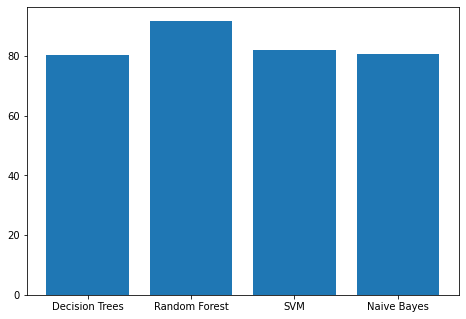

In [47]:
#Plotting the performance of all 4 previous algorithms
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifiers = ['Decision Trees', 'Random Forest', 'SVM', 'Naive Bayes']
scoress = [scoreDT,scoreRF,scoreSVM,scoreNB]
ax.bar(classifiers,scoress)
plt.show()

USING A FULLY CONNECTED ANN:

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

In [ ]:
train_data

In [62]:
#Splitting the data so that it can be used to train an ANN
np.random.seed(50)


import random
random.shuffle(dataALL)
split1= int(0.7*(len(dataALL)))
split2 = int(0.85*(len(dataALL)))
train_data1 = dataALL[:split1]
val_data1 = dataALL[split1:split2]
test_data1 = dataALL[split2:]
'''train_label = dataALL[:split1,30]
val_label = dataALL[split1:split2,30]
test_label = dataALL[split2:,30]'''

np.random.seed(50)


random.shuffle(dataUD)
split1= int(0.7*(len(dataUD)))
split2 = int(0.85*(len(dataUD)))
train_dataU1 = dataUD[:split1]
val_dataU1 = dataUD[split1:split2]
test_dataU1 = dataUD[split2:]
'''train_labelU = dataALL[:split1,30]
val_labelU = dataALL[split1:split2,30]
test_labelU = dataALL[split2:,30]'''

'train_labelU = dataALL[:split1,30]\nval_labelU = dataALL[split1:split2,30]\ntest_labelU = dataALL[split2:,30]'

Training the model with all the data including split decisions

In [63]:
#Preparing the data
batch_size = 64
num_workers = 1

train1_loader = torch.utils.data.DataLoader(train_data1, batch_size= batch_size, 
                                           num_workers= num_workers, shuffle=True)

val1_loader = torch.utils.data.DataLoader(val_data1, batch_size= batch_size, 
                                         num_workers= num_workers, shuffle=True)

test1_loader = torch.utils.data.DataLoader(test_data1, batch_size= batch_size, 
                                          num_workers= num_workers, shuffle=True)

In [49]:
# define a 2-layer artificial neural network
class Judge(nn.Module):
    def __init__(self):
        super(Judge, self).__init__()
        self.layer1 = nn.Linear(30, 20)
        self.layer2 = nn.Linear(20, 10)
        self.layer3 = nn.Linear(10, 1)
    def forward(self, img):
        flattened = img.view(-1, 31)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        activation2 = F.relu(activation2)
        activation3 = self.layer3(activation2)
        return activation3

judge=Judge()

In [ ]:
'''NOT DONE YET


# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for i in range(0,50):
  for (image, label) in mnist_train:
      # actual ground truth: is the digit less than 3?
      actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
      # pigeon prediction
      out = pigeon(img_to_tensor(image)) # step 1-2
      # update the parameters based on the loss
      loss = criterion(out, actual)      # step 3
      loss.backward()                    # step 4 (compute the updates for each parameter)
      optimizer.step()                   # step 4 (make the updates for each parameter)
      optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))'''